# Premiers pas en *Python/Pandas*

***
> __Auteur__: Joseph Salmon
> <joseph.salmon@umontpellier.fr>

<a id="sommaire"> </a>
## Sommaire

*  __[Introduction et présentation](#intro)__ <br>

<a id="intro"> </a>

# Introduction et présentation

## Import des packages usuels:

In [1]:
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import seaborn as sns
from scipy.stats import norm
from download import download

## Verifier les versions des packages utilisées:

In [2]:
print('The python version is', platform.python_version())
print('numpy {}.'.format(np.__version__))

The python version is 3.6.8
numpy 1.15.2.


## Commande "magique" pour un affichage plus avancé en Jupyter:

In [3]:
%matplotlib notebook

## Préparation pour l'affichage graphique et sauvegarder les images:

In [4]:
# saving tools for the course:
sns.set_context("paper", font_scale=1)
sns.set_style("ticks")
sns.set_palette("colorblind")

plt.rcParams.update({'figure.max_open_warning': 50})  # avoid warning when too many plots are opened

# colors 
brown = (0.64, 0.16, 0.16)
purple = (148. / 255, 0, 211. / 255)


dirname = "../prebuiltimages/"
imageformat = ".pdf"

## Grossesses et cigarettes, impact sur la santé du nouveau né

Description des données:

"This  dataset  is  found  from
http://www.stat.berkeley.edu/users/statlabs/labs.html. 
It accompanies the excellent text Stat Labs:  Mathematical Statistics through Applications
Springer-Verlag (2001) by Deborah Nolan and Terry Speed."

Plus de détails:
https://www.stat.berkeley.edu/users/statlabs/papers/sample.pdf
(notamment sur les biais de collectes des données...)

## Téléchargement et import pour sauvegarder les données

In [5]:
# to use the default values of utils for instance
saving = True
path_target = "./utils.py"
url_shared_files = "http://josephsalmon.eu/enseignement/Montpellier/HLMA408/sharedcode/utils.py"
download(url_shared_files, path_target, replace=False)
from utils import my_saving_display

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


## Téléchargement et import des données

In [6]:
url = "http://josephsalmon.eu/enseignement/datasets/babies23.data"
# url = "http://www.stat.berkeley.edu/users/statlabs/data/babies23.data" # backup url, without header.
path_target = "./babies23.data"
download(url, path_target, replace=False)

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


'./babies23.data'

In [7]:
?pd.read_csv  # uncomment for help

## Option de *pandas* et de pré-traitement:

In [8]:
# Preoprocessing: only run once or big trouble (think about it!)
is_preprocessing_done = 0  # init at 0,if greater don't redo it
pd.options.display.max_rows = 8  # set not to display to many lines in pandas
pd.set_option('precision', 0)  # set to display number at precision 0 in pandas

## Lecture de la base de données et constructions d'un dataframe:

In [9]:
df_babies = pd.read_csv("babies23.data", skiprows=38, sep='\s+') # \s+ : for hanlding spaces
df_babies.head(n=10)  # df stands for Data Frame

,id,pluralty,outcome,date,gestation,sex,wt,parity,race,age,...,drace,dage,ded,dht,dwt,marital,inc,smoke,time,number
0,15,5,1,1411,284,1,120,1,8,27,...,8,31,5,65,110,1,1,0,0,0
1,20,5,1,1499,282,1,113,2,0,33,...,0,38,5,70,148,1,4,0,0,0
2,58,5,1,1576,279,1,128,1,0,28,...,5,32,1,99,999,1,2,1,1,1
3,61,5,1,1504,999,1,123,2,0,36,...,3,43,4,68,197,1,8,3,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,102,5,1,1449,244,1,138,4,7,33,...,7,37,4,99,999,1,98,0,0,0
7,129,5,1,1562,245,1,132,2,7,23,...,7,23,4,71,192,1,2,0,0,0
8,142,5,1,1408,289,1,120,3,0,25,...,3,26,1,70,180,0,2,0,0,0
9,148,5,1,1568,299,1,143,3,0,30,...,0,34,5,99,999,1,2,1,1,4


## Statistiques descriptives élémentaires:

In [10]:
df_babies.describe()

,id,pluralty,outcome,date,gestation,sex,wt,parity,race,age,...,drace,dage,ded,dht,dwt,marital,inc,smoke,time,number
count,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236,...,1236,1236,1236,1236,1236,1e+03,1236,1e+03,1236,1236
mean,6001,5,1,1536,287,1,120,2,3,27,...,4,31,3,82,505,1e+00,13,9e-01,2,3
std,2257,0,0,107,75,0,18,2,4,6,...,7,9,2,14,407,3e-01,28,1e+00,9,9
min,15,5,1,1350,148,1,55,0,0,15,...,0,18,0,60,110,0e+00,0,0e+00,0,0
25%,5286,5,1,1444,272,1,109,0,0,23,...,0,25,2,70,165,1e+00,2,0e+00,0,0
50%,6730,5,1,1540,280,1,120,1,3,26,...,3,29,4,73,190,1e+00,4,1e+00,1,1
75%,7583,5,1,1627,288,1,131,3,7,31,...,7,35,5,99,999,1e+00,7,1e+00,1,3
max,9263,5,1,1714,999,1,176,13,99,99,...,99,99,9,99,999,5e+00,98,9e+00,99,98


## Données nan (ou Not A Number / données manquantes):

In [11]:
(df_babies.isnull().any()) # no missing values?

id          False
pluralty    False
outcome     False
date        False
            ...  
inc         False
smoke       False
time        False
number      False
Length: 23, dtype: bool

<IPython.core.display.Javascript object>


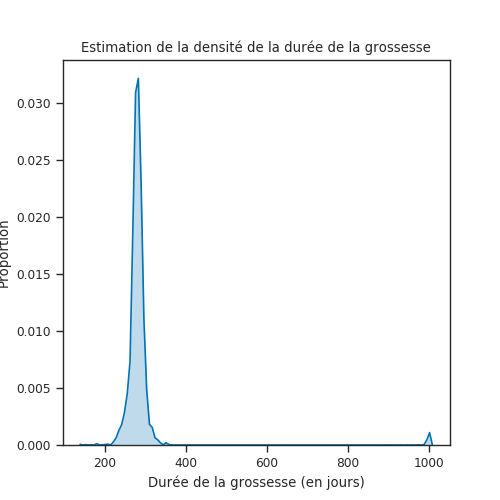

/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Estimation de la densité de la durée de la grossesse')

In [12]:
plt.figure(figsize=(5,5))
ax = sns.kdeplot(df_babies['gestation'], shade=True)
plt.xlabel('Durée de la grossesse (en jours)')
plt.ylabel('Proportion')
ax.legend().set_visible(False)
plt.title("Estimation de la densité de la durée de la grossesse")

# Commentaires sur la base de données:
Bizarre Bizarre des grossesses qui durent 1000 jours ....

In [13]:
percentage_na = np.sum(df_babies['gestation']
                       == 999) / df_babies['gestation'].count() * 100
print("Il y a {0:.2f}% des grossesses de la base de donnée qui durent 999 jours...".format(
    percentage_na))  # {0:.2f} use to display only 2 digits after the sign "." 

Il y a 1.05% des grossesses de la base de donnée qui durent 999 jours...


# Pré-traitement:
Lire l'entête du fichier pour comprendre tout ça... les unités, les données manquantes etc.

In [14]:
if is_preprocessing_done<1:
    print("You have to do the pre-processing only once, to avoid unit issues")
    # Remark: use inplace option to avoid useless copies for nans
    df_babies['gestation'].replace(999, np.nan, inplace=True) 
    df_babies['smoke'].replace(9, np.nan, inplace=True)  # handle missing values

    df_babies['ht'].replace(99, np.nan, inplace=True)  # handle missing values
    df_babies['dht'].replace(99, np.nan, inplace=True)  # handle missing values
    df_babies['ht'] = df_babies['ht'] * 2.54  # inches -> cm
    df_babies['dht'] = df_babies['dht'] * 2.54  # inches -> cm
    
    df_babies['wt'] * 28.3495 / 1000  # onces -> kg
    df_babies['dwt'].replace(999, np.nan, inplace=True)  # handle missing values
    df_babies['wt.1'].replace(999, np.nan, inplace=True)  # handle missing values

    df_babies['wt'] = df_babies['wt'] * 0.453592  # onces -> kg
    df_babies['wt.1'] = df_babies['wt.1'] * 0.453592  # onces -> kg
    df_babies['dwt'] = df_babies['dwt'] * 0.453592  # onces -> kg

    df_babies['number'].replace(9, np.nan, inplace=True)
    df_babies['number'].replace(98, np.nan, inplace=True)
    df_babies['number'].replace(99, np.nan, inplace=True)

    df_babies['number'].replace(1, 2.5, inplace=True)
    df_babies['number'].replace(3, 12, inplace=True)
    df_babies['number'].replace(4, 17, inplace=True)
    df_babies['number'].replace(5, 24.5, inplace=True)
    df_babies['number'].replace(6, 34.5, inplace=True)
    df_babies['number'].replace(7, 50, inplace=True)
    df_babies['number'].replace(8, 70, inplace=True)
    df_babies['number'].replace(2, 7, inplace=True)

    df_babies.dropna(inplace=True)
    print("This is done only because {} < 1".format(is_preprocessing_done))
    is_preprocessing_done +=1

You have to do the pre-processing only once, to avoid unit issues
This is done only because 0 < 1


<IPython.core.display.Javascript object>


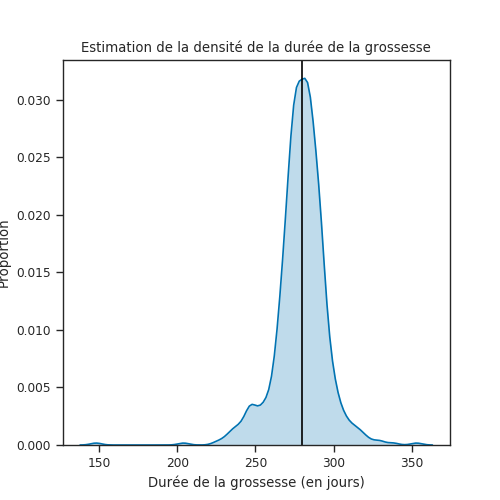

Maintenant il y a 0 des valeurs manquantes identifiées.


/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [15]:
plt.figure(figsize=(5, 5))
ax = sns.kdeplot(df_babies['gestation'], shade=True)
plt.xlabel('Durée de la grossesse (en jours)')
plt.ylabel('Proportion')
plt.axvline(40 * 7, c='k')  # bar à 40 semaines
ax.legend().set_visible(False)
plt.title("Estimation de la densité de la durée de la grossesse")
print("Maintenant il y a {} des valeurs manquantes identifiées.".format(

    sum(df_babies["gestation"].isnull())))

In [16]:
pd.set_option('precision',3)  # display 3 digits now in pandas

In [17]:
df_babies['dwt']  # mothers pre-pregnancy weight in kg

0       49.895
1       67.132
5       58.967
7       87.090
         ...  
1232    77.111
1233    81.647
1234    74.843
1235    78.018
Name: dwt, Length: 695, dtype: float64

In [18]:
df_babies['wt'] # babies weight in kg

0       54.431
1       51.256
5       61.689
7       59.874
         ...  
1232    58.060
1233    58.967
1234    56.699
1235    53.070
Name: wt, Length: 695, dtype: float64

In [19]:
df_babies['wt.1']  # father weight in kg

0       45.359
1       61.235
5       42.184
7       63.503
         ...  
1232    54.431
1233    68.039
1234    49.895
1235    58.513
Name: wt.1, Length: 695, dtype: float64

In [20]:
# Exercice: afficher les poids des parents et visualiser les différences?

In [21]:
# Réponse:
# plt.figure(figsize=(3,3))
# plt.title("Poids des parents (densité)")
# sns.kdeplot(df_babies['wt.1'], label="Père")
# sns.kdeplot(df_babies['wt'], label="Mère")
# plt.xlabel("Poids (kg)")
# plt.tight_layout()

<IPython.core.display.Javascript object>


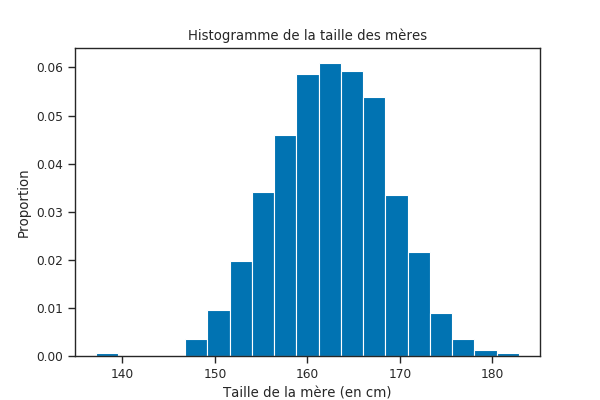

/home/jo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [22]:
fig_hist_height = plt.figure(figsize=(6,4))
plt.hist(df_babies['ht'], normed=True, bins=19)
plt.xlabel('Taille de la mère (en cm)')
plt.ylabel('Proportion')
plt.title("Histogramme de la taille des mères")
my_saving_display(fig_hist_height, dirname, "hist_height_mother", imageformat,saving=saving)

<IPython.core.display.Javascript object>


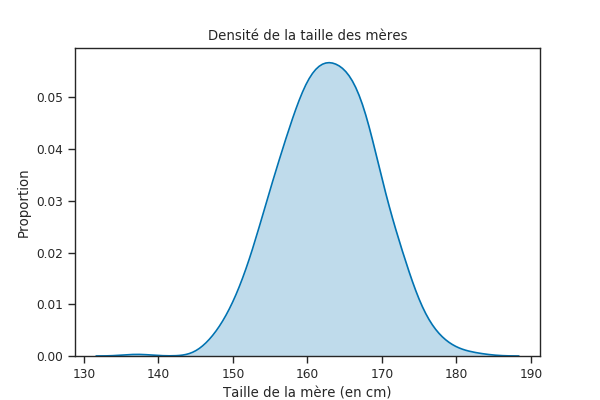

/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [23]:
fig_hist_height = plt.figure(figsize=(6,4))
ax = sns.kdeplot(df_babies['ht'], shade=True)
plt.xlabel('Taille de la mère (en cm)')
plt.ylabel('Proportion')
plt.title("Densité de la taille des mères")
ax.get_legend().remove()
my_saving_display(fig_hist_height, dirname,
                  "kde_height_mother", imageformat, saving=saving)

<IPython.core.display.Javascript object>


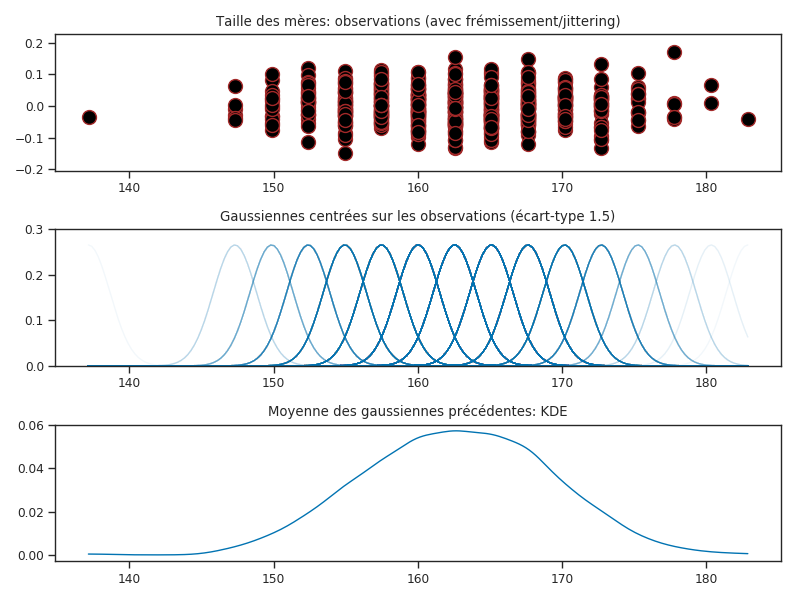

In [24]:
n_samples = df_babies['ht'].count()  # put 10 to visualize better
sample = df_babies['ht'].iloc[0:n_samples]
y = np.zeros(n_samples,) + 0.05 * np.random.randn(n_samples,)
bandwidth = 1.5
x = np.linspace(sample.min(), sample.max(), num=200)
z = np.zeros(200)

fig, ax = plt.subplots(3, 1, figsize=(8, 6))
for i in range(n_samples):
    current_density = norm.pdf(x, sample.iloc[i], bandwidth)
    z += current_density / n_samples
    ax[1].plot(x, current_density, '-',
               color=sns.color_palette()[0], lw=1, alpha=0.05)
ax[1].set_title(
    "Gaussiennes centrées sur les observations (écart-type {0})".format(bandwidth))
ax[1].set_ylim(0, .3)

ax[0].scatter(sample, y, c='black', s=100,
              marker='o', edgecolors=brown, lw='1')
ax[0].set_title("Taille des mères: observations (avec frémissement/jittering)")

ax[2].plot(x, z, '-', color=sns.color_palette()[0], lw=1)
ax[2].set_title("Moyenne des gaussiennes précédentes: KDE")
# ax[2].set_ylim(0,.06)

plt.tight_layout()
my_saving_display(fig, dirname,
                  "kde_for_dummies", imageformat, saving=saving)

## Remarque:
Dans la partie ci-dessus le coefficient alpha permet d'afficher de manière plus opaque les gaussiennes qui sont plus fréquentes que les autres

## Histogramme et densité gaussienne : le théorème de la limite centrale en action sur données réelles (pour la taille des mères)

<IPython.core.display.Javascript object>


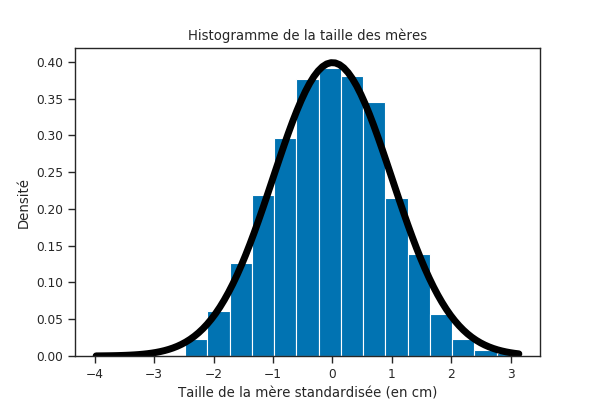

Moyenne=162.71715107913673 (cm) et écart-type=6.4288819931782255 (cm)


In [25]:
fig_hist_height, axs = plt.subplots(1, 1, figsize=(6,4))

mean = np.mean(df_babies['ht'])
sd = np.std(df_babies['ht'])

print("Moyenne={0} (cm) et écart-type={1} (cm)".format(mean,sd))

plt.hist((df_babies['ht']-mean)/sd, density=True, bins=19)
x = np.linspace(((df_babies['ht']-mean)/sd).min(), ((df_babies['ht']-mean)/sd).max(), 100)
plt.xlabel('Taille de la mère standardisée (en cm)')
plt.ylabel('Densité')
plt.title("Histogramme de la taille des mères")

plt.plot(x, norm.pdf(x, 0, 1), 'k-', lw=5)
my_saving_display(fig_hist_height, dirname,
                  "hist_n_gauss_height_mother", imageformat, saving=saving)

In [26]:
# Exercice: affiché la taille des parents (densité):

<IPython.core.display.Javascript object>


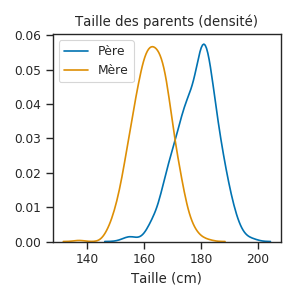

/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [27]:
# Réponse:
plt.figure(figsize=(3,3))
plt.title("Taille des parents (densité)")
sns.kdeplot(df_babies['dht'], label="Père")
sns.kdeplot(df_babies['ht'], label="Mère")
plt.xlabel("Taille (cm)")
plt.tight_layout()

<IPython.core.display.Javascript object>


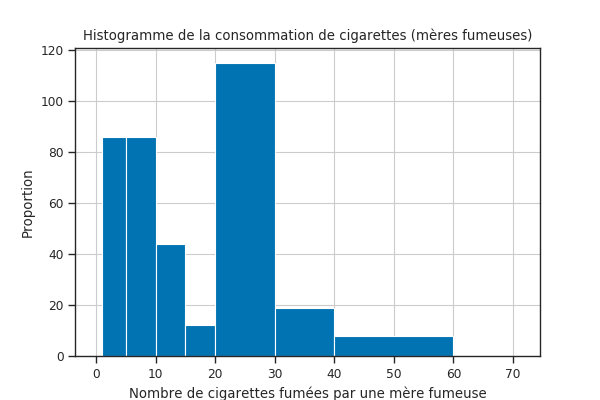

In [28]:
fig_hist_cigs = plt.figure(figsize=(6, 4))

hist_manual = df_babies.loc[df_babies.number > 0, 'number']
hist_manual.hist(bins=[0, 1, 5, 10, 15, 20, 30, 40, 60, 71], density=False)
plt.xlabel('Nombre de cigarettes fumées par une mère fumeuse')
plt.ylabel('Proportion')
plt.title("Histogramme de la consommation de cigarettes (mères fumeuses)")
my_saving_display(fig_hist_cigs, dirname,
                  "hist_cigs_mother", imageformat, saving=saving)

In [29]:
# hist_manual
hist_manual.value_counts() / hist_manual.count() * 100

24.5    31.081
2.5     23.243
7.0     23.243
12.0    11.892
34.5     5.135
17.0     3.243
50.0     2.162
Name: number, dtype: float64

In [30]:
# check sum =100%
np.sum(hist_manual.value_counts() / hist_manual.count() * 100)

99.99999999999999

<IPython.core.display.Javascript object>


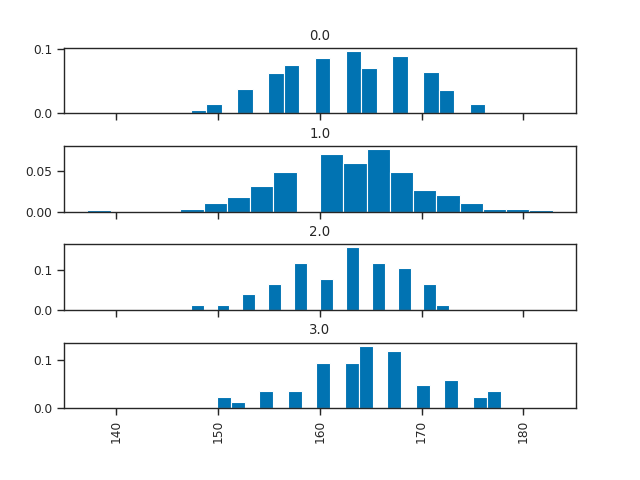

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ebd79acf8>,
      dtype=object)

In [31]:
# histogram of height by type of smoker: 0 never, 1 now, 2 during pregnancy, 3 within 1yr
df_babies.hist(column='ht', by='smoke',density=True, bins=20, grid=False, layout=(4,1), sharex=True)

In [32]:
plt.subplots?

<IPython.core.display.Javascript object>


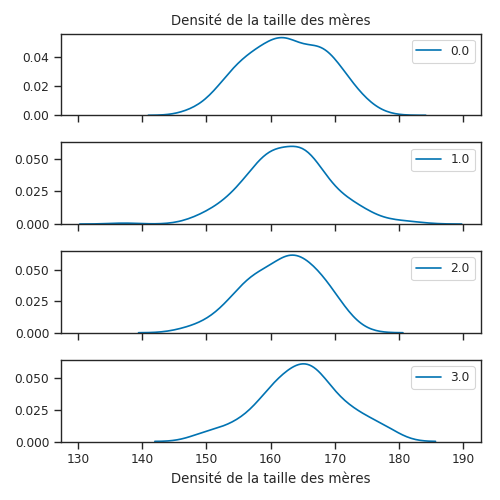

/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [33]:
nrow = 4
ncol = 1
fig, axs = plt.subplots(nrow, ncol,figsize=(5,5),sharex=True)
for i, group in enumerate(df_babies.groupby("smoke")):
    if i is 0:
        axs[i].set_title("Densité de la taille des mères")    
    sns.kdeplot(group[1]["ht"],ax=axs[i],label=group[0])
    if i is 3:
        axs[i].set_xlabel("Densité de la taille des mères")    
plt.tight_layout()

<IPython.core.display.Javascript object>


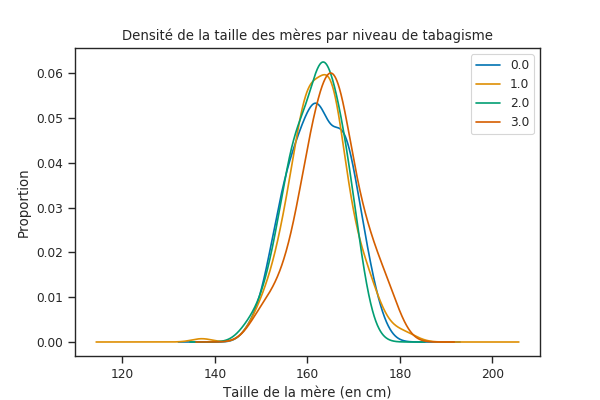

Text(0.5,1,'Densité de la taille des mères par niveau de tabagisme')

In [34]:
plt.figure(figsize=(6,4))
df_babies.groupby("smoke").ht.plot(kind='kde')
plt.legend()
plt.xlabel('Taille de la mère (en cm)')
plt.ylabel('Proportion')
plt.title("Densité de la taille des mères par niveau de tabagisme")

# Densité bi-dimensionnelle:

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


<IPython.core.display.Javascript object>


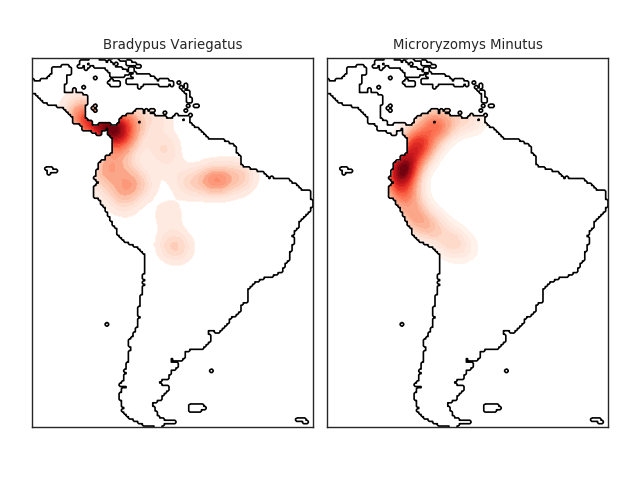

 - computing KDE in spherical coordinates
 - plot coastlines from coverage
 - computing KDE in spherical coordinates
 - plot coastlines from coverage


In [35]:
path_target = "./plot_species_kde.py"
url_shared_files = "https://raw.githubusercontent.com/scikit-learn/scikit-learn/master/examples/neighbors/plot_species_kde.py"
download(url_shared_files, path_target, replace=False)

exec(open('plot_species_kde.py').read())
my_saving_display(fig, dirname, "KDE2D", imageformat,saving=saving)

# Statistiques descriptives

In [36]:
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D

X = df_babies['dwt']  # Father height
nb_samples = X.shape[0]
y = np.ones(nb_samples,) + 0.05 * np.random.randn(nb_samples,)

# Statistique:
meanX = np.mean(X)  # mean
minX = np.min(X)  # min
maxX = np.max(X)  # max
medX = np.median(X)  # median
MADX = np.median(np.abs(X - medX))  # mean absolute deviation
s = np.std(X)  # standard deviation devault of numpy is 1/n, see np.std?

alpha_trim = 0.15
tmeanX = stats.trim_mean(X, alpha_trim)  # trimmed mean (level: alpha_trim)

dim1, dim2 = 9, 3

/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2831: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.mean(atmp[sl], axis=axis)


## La moyenne (empirique):

<IPython.core.display.Javascript object>


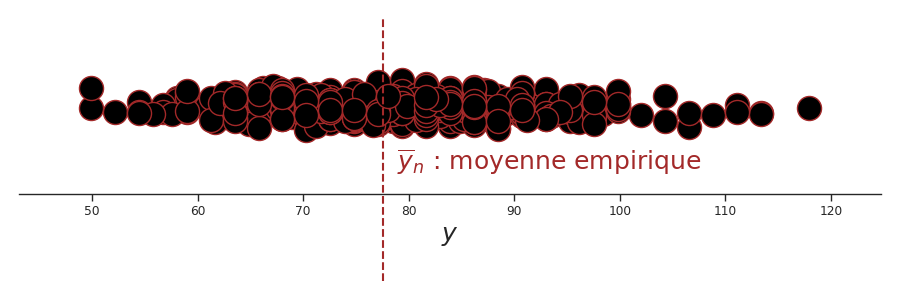

In [37]:
fig1, ax = plt.subplots(figsize=(dim1, dim2))
ax.set_ylim(0, 1.5)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=300, marker='o', edgecolors=brown, lw='1')
ax.plot([meanX, meanX], [0, 1.5], color=brown, lw=1.5, ls="--")

plt.xlabel(r'$y$', fontsize=18)
plt.annotate(r'$\overline{y}_n$ : moyenne empirique',
             xy=(meanX, 0.4), xycoords='data', xytext=(+10, +30),
             textcoords='offset points', fontsize=18, color=brown)

plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "DadWeightMean", imageformat,saving=saving)

## La médiane (empirique):

<IPython.core.display.Javascript object>


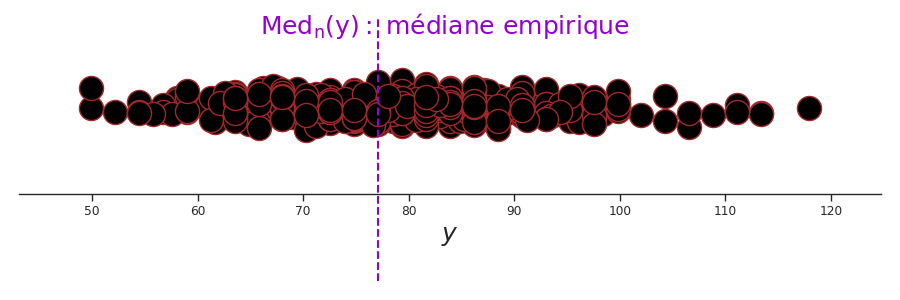

In [38]:
fig2, ax = plt.subplots(figsize=(dim1, dim2))
ax.set_ylim(0, 1.5)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=300, marker='o', edgecolors=brown, lw='1')

ax.plot([medX, medX], [0, 1.5], color=purple, lw=1.5, ls="--")
plt.xlabel(r'$y$', fontsize=18)
plt.annotate(r'$\rm{Med}_n(y):$ médiane empirique',
             xy=(medX, 1), xycoords='data', xytext=(-85, +52),
             textcoords='offset points', fontsize=18, color=purple)

plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "DadWeightMediane", imageformat,saving=saving)

## La moyenne tronquée (au niveau alpha_trim)

<IPython.core.display.Javascript object>


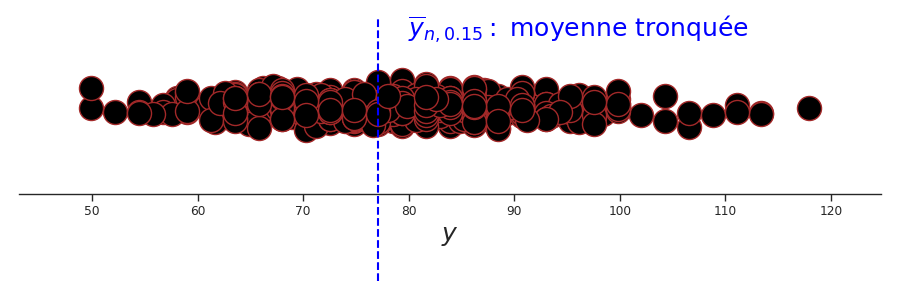

In [39]:
fig1, ax = plt.subplots(figsize=(dim1, dim2))
ax.set_ylim(0, 1.5)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=300, marker='o', edgecolors=brown, lw='1')

ax.plot([tmeanX, tmeanX], [0, 1.5], c='blue', lw=1.5, ls="--")
plt.xlabel(r'$y$', fontsize=18)
tt = "$\overline{y}_{n,%s} :$ moyenne tronquée" % str(alpha_trim)
plt.annotate(tt, xy=(tmeanX, 1), xycoords='data', xytext=(+22, +50),
             textcoords='offset points', fontsize=18, color='blue')

plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "DadWeightTrimmed", imageformat,saving=saving)


## Comparatif des statistiques de centrages (ou de position)

<IPython.core.display.Javascript object>


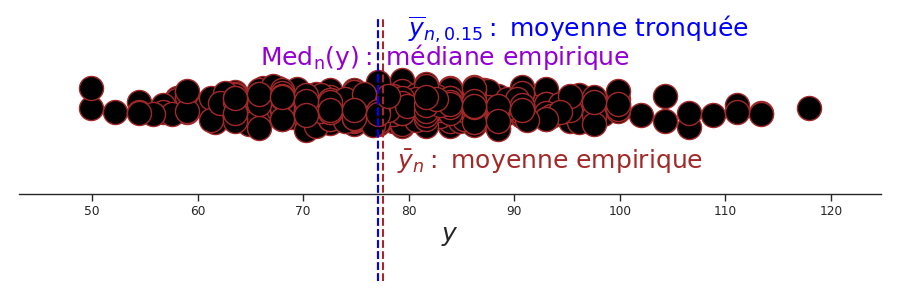

In [40]:
fig1, ax = plt.subplots(figsize=(dim1, dim2))
ax.set_ylim(0, 1.5)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=300, marker='o', edgecolors=brown, lw='1')

ax.plot([meanX, meanX], [0, 1.5], color=brown, lw=1.5, ls="--")
ax.plot([medX, medX], [0, 1.5], color=purple, lw=1.5, ls="--")
ax.plot([tmeanX, tmeanX], [0, 1.5], color='blue',
        lw=1.5, ls="--")

plt.xlabel(r'$y$', fontsize=18)
plt.annotate(r'$\rm{Med}_n(y):$ médiane empirique',
             xy=(medX, 1), xycoords='data', xytext=(-85, +30),
             textcoords='offset points', fontsize=18, color=purple)
plt.annotate(r'$\bar{y}_n :$ moyenne empirique', xy=(meanX, 0.4),
             xycoords='data', xytext=(+10, +30), textcoords='offset points',
             fontsize=18, color=brown)
plt.annotate(tt, xy=(tmeanX, 1), xycoords='data', xytext=(+22, +50),
             textcoords='offset points', fontsize=18, color='blue')

plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "DadWeightMedianeMean", imageformat,saving=saving)

## L'écart-type (empirique)

<IPython.core.display.Javascript object>


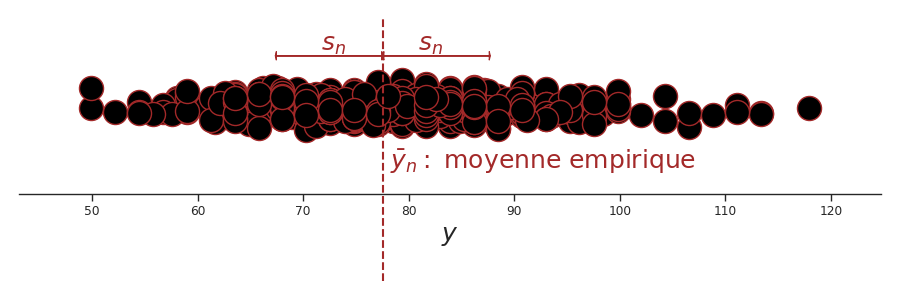

In [41]:
fig1, ax = plt.subplots(figsize=(dim1, dim2))
ax.set_ylim(0, 1.5)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=300, marker='o', edgecolors=brown, lw='1')
ax.plot([meanX, meanX], [0, 1.5], color=brown, lw=1.5, ls="--")

altitude = 1.29
plt.arrow(meanX, altitude, -s, 0, fc=brown, ec=brown,
          head_width=0.05, head_length=0.1, length_includes_head=True)
plt.arrow(meanX - s, altitude, s, 0, fc=brown, ec=brown,
          head_width=0.05, head_length=0.1, length_includes_head=True)
plt.arrow(meanX, altitude, s, 0, fc=brown, ec=brown,
          head_width=0.05, head_length=0.1, length_includes_head=True)
plt.arrow(meanX + s, altitude, -s, 0, fc=brown, ec=brown,
          head_width=0.05, head_length=0.1, length_includes_head=True)

plt.xlabel(r'$y$', fontsize=18)

plt.annotate(r'$\bar{y}_n :$ moyenne empirique',
             xy=(meanX, 0.4), xycoords='data', xytext=(+5, +30),
             textcoords='offset points', fontsize=18, color=brown)
plt.annotate(r'$s_n$', xy=(meanX + s * (0.2), 1), xycoords='data',
             xytext=(+10, +40), textcoords='offset points', fontsize=18,
             color=brown)
plt.annotate(r'$s_n$', xy=(meanX - s * (0.7), 1), xycoords='data',
             xytext=(+10, +40), textcoords='offset points', fontsize=18,
             color=brown)

plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "DadWeightSD", imageformat, saving=saving)

## Median of Absolute Deviation (MAD)

<IPython.core.display.Javascript object>


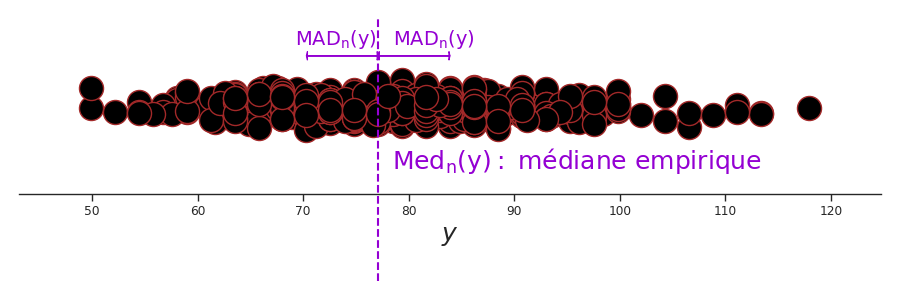

In [42]:
fig1, ax = plt.subplots(figsize=(dim1, dim2))
ax.set_ylim(0, 1.5)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=300, marker='o', edgecolors=brown, lw='1')
ax.plot([medX, medX], [0, 1.5], color=purple, lw=1.5, ls="--")

altitude = 1.29

plt.arrow(medX, altitude, -MADX, 0, fc=purple, ec=purple, head_width=0.05,
          head_length=0.1, length_includes_head=True)
plt.arrow(medX - MADX, altitude, MADX, 0, fc=purple, ec=purple, head_width=0.05,
          head_length=0.1, length_includes_head=True)
plt.arrow(medX, altitude, MADX, 0, fc=purple, ec=purple, head_width=0.05,
          head_length=0.1, length_includes_head=True)
plt.arrow(medX + MADX, altitude, -MADX, 0, fc=purple, ec=purple, head_width=0.05,
          head_length=0.1, length_includes_head=True)

plt.xlabel(r'$y$', fontsize=18)

plt.annotate(r'$\rm{Med}_n(y):$ médiane empirique',
             xy=(medX, 0.4), xycoords='data', xytext=(+10, +30),
             textcoords='offset points', fontsize=18, color=purple)
plt.annotate(r'$\rm{MAD}_n(y)$', xy=(medX + MADX * (0.01), 1),
             xycoords='data', xytext=(+10, +44), textcoords='offset points',
             fontsize=14, color=purple)
plt.annotate(r'$\rm{MAD}_n(y)$', xy=(medX - MADX * (1.35), 1),
             xycoords='data', xytext=(+10, +44), textcoords='offset points',
             fontsize=14, color=purple)

plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "DadWeightMAD", imageformat,saving=saving)

## Fonction de répartition (empirique)

<IPython.core.display.Javascript object>


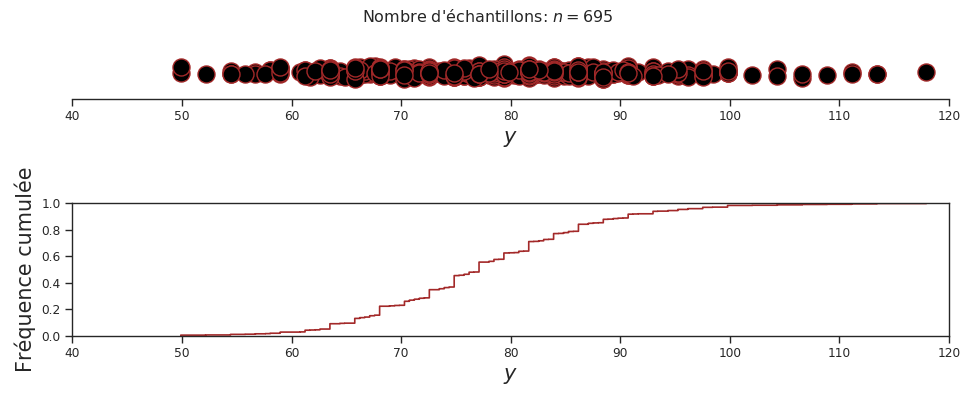

In [43]:
yrange_lim_down = (0., 1.)
yrange_lim_up = (-0.5, 2)
yrange_lim = (-0.1, 0.5)
xrange_lim = (40, 120)

sorted_data = np.sort(X)

dim1, dim2 = (13, 8)
fontsize = 15

fig1 = plt.figure(figsize=(dim1 * 1.5/2, dim2/2))

# plt.subplots_adjust(hspace=0.3)
ax = fig1.add_subplot(211)
ax.set_ylim(yrange_lim_up)
ax.set_xlim(xrange_lim)
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=150, marker='o', edgecolors=brown, lw='1')

plt.xlabel(r'$y$', fontsize=fontsize)
plt.suptitle(r"Nombre d'échantillons: " + "$n={0}$".format(nb_samples),
             multialignment='center')

ax2 = fig1.add_subplot(212)
ax2.set_xlim(xrange_lim)
ax2.set_ylim(yrange_lim_down)
plt.step(sorted_data, np.arange(sorted_data.size, dtype='float') / nb_samples,
         color=brown)
plt.ylabel(r'Fréquence cumulée', fontsize=fontsize)
plt.xlabel(r'$y$', fontsize=fontsize)
plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "DadWeightcdf", imageformat, saving=saving)

### Exercice: Quelle est la taille des sauts?

## Quantiles (empiriques)

<IPython.core.display.Javascript object>


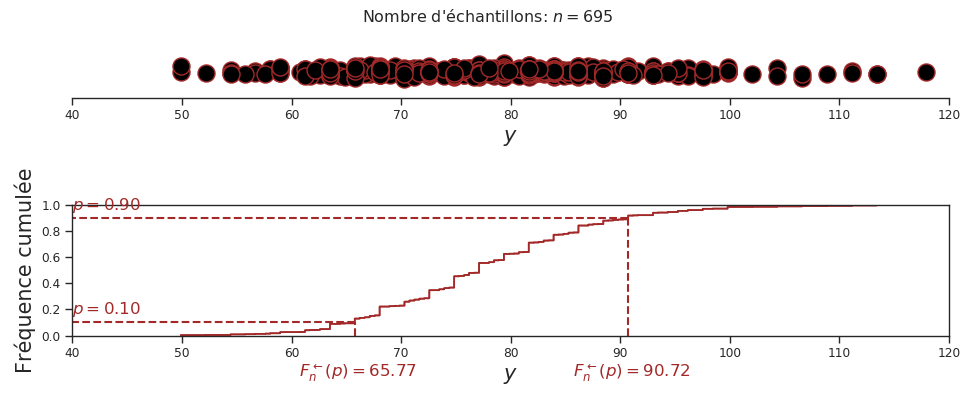

In [44]:
fig2 = plt.figure(figsize=(dim1 * 1.5/2, dim2/2))

plt.subplots_adjust(hspace=0.3)
ax = fig2.add_subplot(211)
ax.set_ylim(yrange_lim_up)
ax.set_xlim(xrange_lim)
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=150, marker='o', edgecolors=brown, lw='1')
plt.xlabel(r'$y$', fontsize=fontsize)
plt.suptitle(r"Nombre d'échantillons: " + "$n={0}$".format(nb_samples),
             multialignment='center')

ax2 = fig2.add_subplot(212)
ax2.set_xlim(xrange_lim)
ax2.set_ylim(yrange_lim_down)
plt.step(sorted_data, np.arange(sorted_data.size, dtype='float') / nb_samples,
         color=brown)

plt.suptitle(r"Nombre d'échantillons: " + "$n={0}$".format(nb_samples),
             multialignment='center')


###############################################################################
# Quantile function: First value to display

p = 0.1
q = np.percentile(X, p * 100)

ax2.plot([q, xrange_lim[0]], [p, p], color=brown, lw=1.5, ls="--")
ax2.plot([q, q], [0, p], color=brown, lw=1.5, ls="--")
ax2.annotate(r'$p=%.2f$' % p, xy=(xrange_lim[0], p), xycoords='data',
             xytext=(0, 6), textcoords='offset points',
             fontsize=fontsize - 3, color=brown)

ax2.annotate(r'$F_n^\leftarrow(p)=%.2f$' % q, xy=(q, 0), xycoords='data',
             xytext=(-40, -30), textcoords='offset points',
             fontsize=fontsize - 3, color=brown)
###############################################################################
# Quantile function: Second value to display

p = 0.90
q = np.percentile(X, p * 100)

ax2.plot([q, xrange_lim[0]], [p, p], color=brown, lw=1.5, ls="--")
ax2.plot([q, q], [0, p], color=brown, lw=1.5, ls="--")
bbox = dict(boxstyle="round", fc="0.8")

ax2.annotate(r'$p=%.2f$' % p, xy=(xrange_lim[0], p), xycoords='data',
             xytext=(0, 6), textcoords='offset points',
             fontsize=fontsize - 3, color=brown)
ax2.annotate(r'$F_n^\leftarrow(p)=%.2f$' % q, xy=(q, 0), xycoords='data',
             xytext=(-40, -30), textcoords='offset points',
             fontsize=fontsize - 3, color=brown)

plt.step(sorted_data, np.arange(sorted_data.size, dtype='float') / nb_samples,
         color=brown)
plt.ylabel(r'Fréquence cumulée', fontsize=fontsize)
plt.xlabel(r'$y$', fontsize=fontsize)

plt.tight_layout()
plt.show()
my_saving_display(fig2, dirname, "DadWeightQuantiles",
                  imageformat, saving=saving)

## Boxplots / Boîte à moustache:
Visualiser la médiane, les quantiles 1/4 et 3/4, 1.5 inter-quartiles et outliers?
voir e.g. : http://www.itse.be/statistique2010/co/233_Cours_boxplot.html

<IPython.core.display.Javascript object>


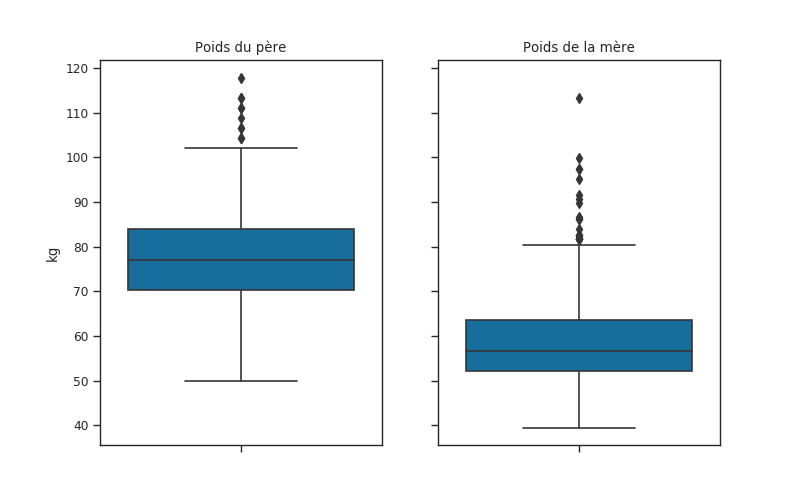

In [45]:
nrow, ncol = (1,2)
fig, axs = plt.subplots(nrow, ncol,figsize=(8, 5),sharey=True)

sns.boxplot(x='dwt',ax=axs[0], data=df_babies, orient='vertical')
axs[0].set_title("Poids du père")
axs[0].set_ylabel("kg")

sns.boxplot(x='wt.1',ax=axs[1], data=df_babies, orient='vertical')
axs[1].set_title("Poids de la mère")
axs[1].set_ylabel("")

my_saving_display(fig, dirname, "DadWeightBoxplot", imageformat,saving=saving)

# Violons

<IPython.core.display.Javascript object>


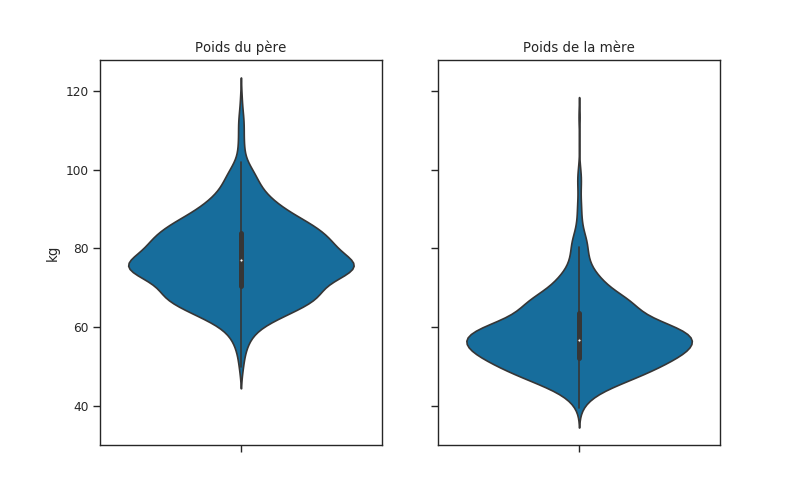

/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [46]:
nrow, ncol = (1,2)
fig, axs = plt.subplots(nrow, ncol,figsize=(8, 5),sharey=True)

sns.violinplot(x='dwt', ax=axs[0], data=df_babies, orient='vertical')
axs[0].set_title("Poids du père")
axs[0].set_ylabel("kg")
# axs[0].yaxis.tick_right()

sns.violinplot(x='wt.1',ax=axs[1], data=df_babies, orient='vertical')
axs[1].set_title("Poids de la mère")
axs[1].set_ylabel("")

my_saving_display(fig, dirname, "DadWeightViolin", imageformat,saving=saving)

# Experience sur les poussins:
Des chercheurs se posent la question de savoir si parmi trois traitements possible, il en existe un meilleur que les autres pour améliorer la prise de poids des poussins.
Ils ont consigné l'impact de trois traitements sur la croissance de 45 poussins pour répondre à cette question.
Les 45 oeufs sont répartis aléatoirement entre les trois types de traitement (15/15/15).
Au bout d'un nombre de jours fixé à l'avance, on mesure la croissance (poids) du poussin et on note alors son sexe.

In [47]:
url = "http://josephsalmon.eu/enseignement/datasets/poussin.txt"
path_target = "./poussins.txt"
download(url, path_target, replace=False)

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


'./poussins.txt'

In [48]:
df_chicken = pd.read_csv("poussins.txt", sep='\s+') # \s+ : for hanlding spaces
df_chicken.head(n=5)  # df stands for Data Frame

,Trait,Sexe,Rdt
0,1,1,26
1,1,1,30
2,1,1,26
3,1,1,33
4,1,1,27


In [49]:
df_chicken.columns=["Traitement", "Sexe", "Poids"]
df_chicken['Sexe'].replace(1, "Male", inplace=True)
df_chicken['Sexe'].replace(2, "Female", inplace=True)
df_chicken.head()

,Traitement,Sexe,Poids
0,1,Male,26
1,1,Male,30
2,1,Male,26
3,1,Male,33
4,1,Male,27


<IPython.core.display.Javascript object>


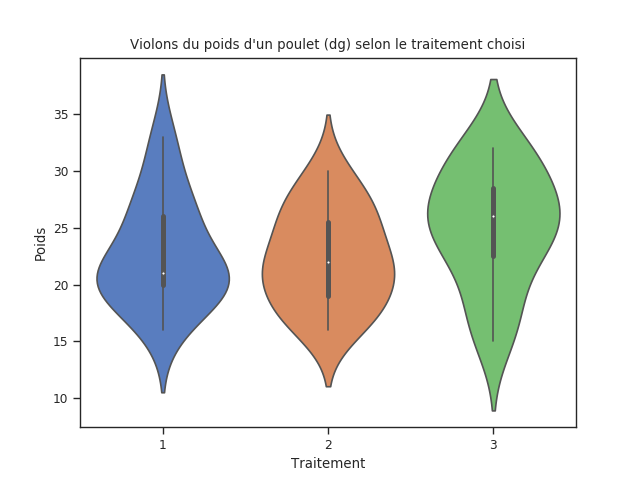

/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [50]:
fig_violons = plt.figure()
sns.violinplot(x="Traitement", y="Poids", data=df_chicken, palette="muted",scale="count")
plt.title("Violons du poids d'un poulet (dg) selon le traitement choisi" )
my_saving_display(fig_violons, dirname, "Violons_poussin", imageformat, saving=saving)

**Conclusion** (partielle): À première vue, le traitement 3 semble celui conduisant à une plus grosse croissance des poussins...

## Utilisation de la variable "Sexe" en plus

<IPython.core.display.Javascript object>


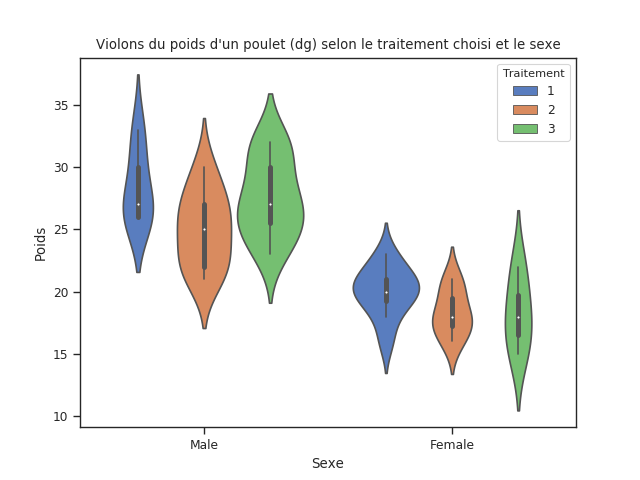

/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [51]:
fig_violons_sexe = plt.figure()
sns.violinplot(x="Sexe", y="Poids", hue="Traitement",
               data=df_chicken, palette="muted", scale="count")
plt.title("Violons du poids d'un poulet (dg) selon le traitement choisi et le sexe")
my_saving_display(fig_violons_sexe, dirname, "Violons_poussin_sexe",
                  imageformat, saving=saving)

In [52]:
df_chicken.groupby(['Sexe','Traitement']).count()

Poids
Sexe   Traitement       
Female 1              10
       2               6
       3               4
Male   1               5
       2               9
       3              11

<IPython.core.display.Javascript object>


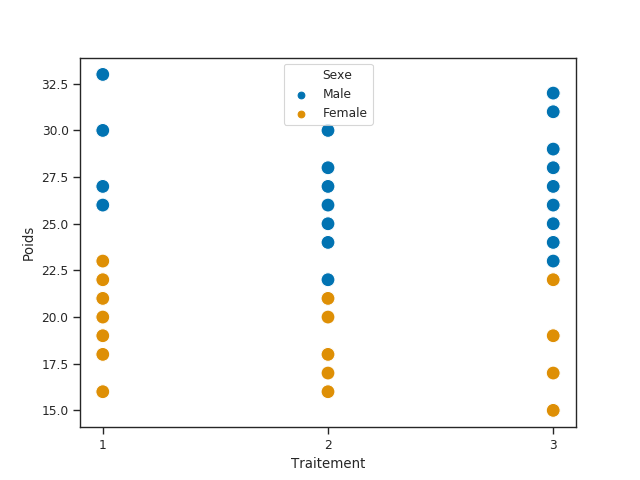

In [53]:
fig1 = plt.figure()
sns.scatterplot(x="Traitement", y="Poids", hue="Sexe", data=df_chicken, s=100)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([1,2,3])
plt.legend()
my_saving_display(fig1, dirname, "distribution_poussin", imageformat, saving=saving)

## Analyse:
Dans le tableau ci-dessus on compte les poussins par type de traitement et par sexe.
Ainsi il y avait 10 femelles qui ont reçu le traitement 1 alors que 5 mâles seulement ont reçu le traitement 1.
L'aspect visuel des premiers violons privilégiant le traitement 3 venait simplement du fait que plus de mâles (dont le poids/rendement en plus gros) avaient reçu le traitement 3. Il faut donc se méfier de comment les classes étaient (ou non) équilibrées... 

# Loi gaussiennes: fonctions de répartition et densité

<IPython.core.display.Javascript object>


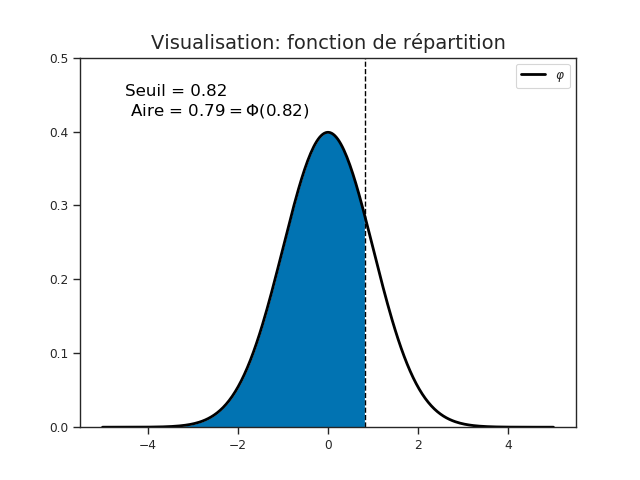

In [54]:
x = np.linspace(-5, 5, 300)
threshold = 168

stat = (threshold - mean) / sd
fig, ax1 = plt.subplots(1, 1)
ax1.plot(x, norm.pdf(x, 0, 1), 'k-', lw=2, label=r"$\varphi$")
ax1.set_ylim(0, 0.5)
ax1.fill_between(x, 0, norm.pdf(x, 0, 1), where=x <= stat)
plt.axvline(x=stat, c='k', ls="--", lw=1)
plt.title("Visualisation: fonction de répartition", fontsize=14)
plt.annotate('Seuil = {0:.2f}\n Aire = ${1:.2f}= \Phi({0:.2f})$'.format(stat, norm.cdf(stat, 0, 1)),
             xy=(-4.5, 0.42), xycoords='data', xytext=(+0, 0.2),
             textcoords='offset points', fontsize=12, color='k')
plt.legend()
my_saving_display(fig, dirname, "VisGaussianCDF", imageformat, saving=saving)

<IPython.core.display.Javascript object>


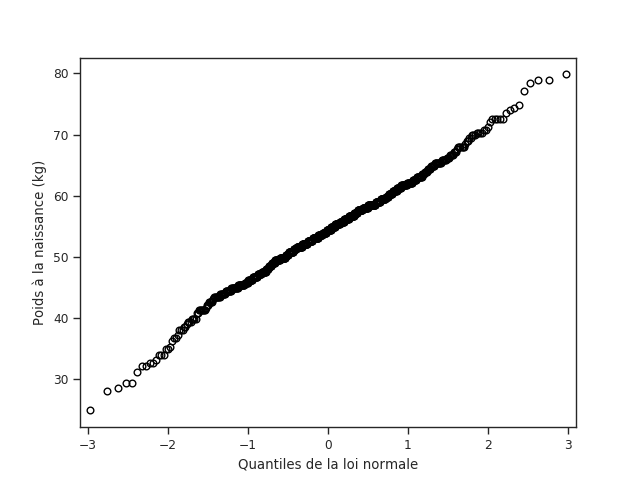

In [55]:
import statsmodels.api as sm
fig = sm.qqplot(df_babies['wt'], stats.norm, c='k', fillstyle = 'none')
plt.ylabel("Poids à la naissance (kg)")
plt.xlabel("Quantiles de la loi normale")
my_saving_display(fig, dirname, "qqplot", imageformat,saving=saving)

In [56]:
df_babies[df_babies['number']>0]['wt.1']

5       42.184
11      56.245
17      56.699
19      64.410
         ...  
1227    39.463
1229    54.885
1230    57.153
1233    68.039
Name: wt.1, Length: 370, dtype: float64

In [57]:
df_babies[df_babies['number']<1]['wt.1']

0       45.359
1       61.235
7       63.503
8       56.699
         ...  
1231    45.359
1232    54.431
1234    49.895
1235    58.513
Name: wt.1, Length: 325, dtype: float64

<IPython.core.display.Javascript object>


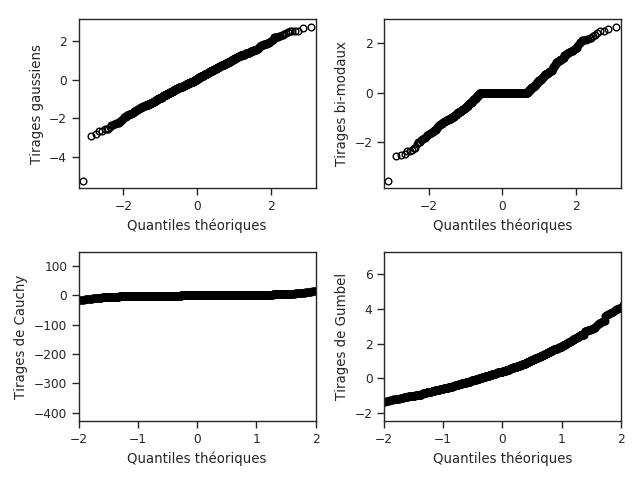

In [58]:
left = -1.8   #x coordinate for text insert
n_samples = 1000

fig = plt.figure()

ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(np.random.randn(n_samples), fillstyle='none', c='k', ax=ax)
top = ax.get_ylim()[1] * 0.75
ax.set_ylabel("Tirages gaussiens")
ax.set_xlabel("Quantiles théoriques")




coin = (2 * np.random.rand(n_samples) - 1) > 0.
ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(coin * np.random.randn(n_samples),fillstyle='none', c='k', ax=ax)
top = ax.get_ylim()[1] * 0.75
# txt = ax.text(left, top, "line='s'", verticalalignment='top')
# txt.set_bbox(dict(facecolor='k', alpha=0.1))
ax.set_ylabel("Tirages bi-modaux")

ax.set_xlabel("Quantiles théoriques")

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(np.random.standard_cauchy(n_samples),fillstyle='none', c='k', ax=ax)
ax.set_xlim(-2, 2)
top = ax.get_ylim()[1] * 0.75
# txt = ax.text(left, top, verticalalignment='top')
# txt.set_bbox(dict(facecolor='k', alpha=0.1))
ax.set_ylabel("Tirages de Cauchy")

ax.set_xlabel("Quantiles théoriques")


ax = fig.add_subplot(2, 2, 4)
sm.graphics.qqplot(np.random.gumbel(0,1,n_samples), c='k',fillstyle='none', ax=ax)
ax.set_xlim(-2, 2)
top = ax.get_ylim()[1] * 0.75
# txt = ax.text(left, top,
# verticalalignment='top')
# txt.set_bbox(dict(facecolor='k', alpha=0.1))
ax.set_ylabel("Tirages de Gumbel")
ax.set_xlabel("Quantiles théoriques")


plt.tight_layout()
my_saving_display(fig, dirname, "qqplots", imageformat,saving=saving)

## Corrélations

In [59]:
df_babies[["dwt","dht"]].corr()

,dwt,dht
dwt,1.000,0.538
dht,0.538,1.000


In [60]:
df_babies[["wt","ht"]].corr()

,wt,ht
wt,1.000,0.219
ht,0.219,1.000


<IPython.core.display.Javascript object>


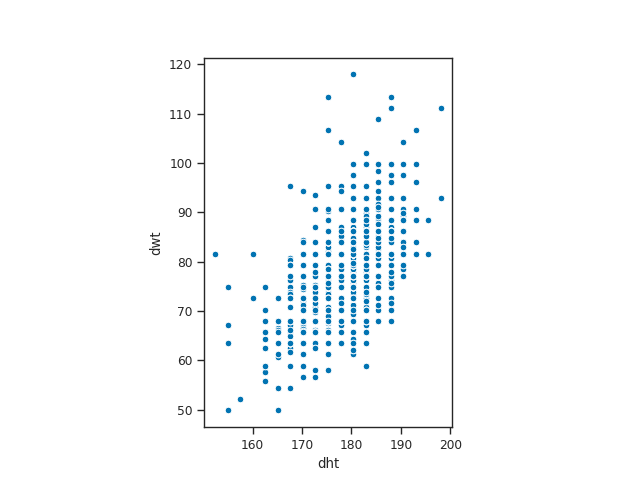

/home/jo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [61]:
plt.figure()
sns.scatterplot(x=df_babies.dht,y=df_babies.dwt)
plt.axes().set_aspect('equal')

<IPython.core.display.Javascript object>


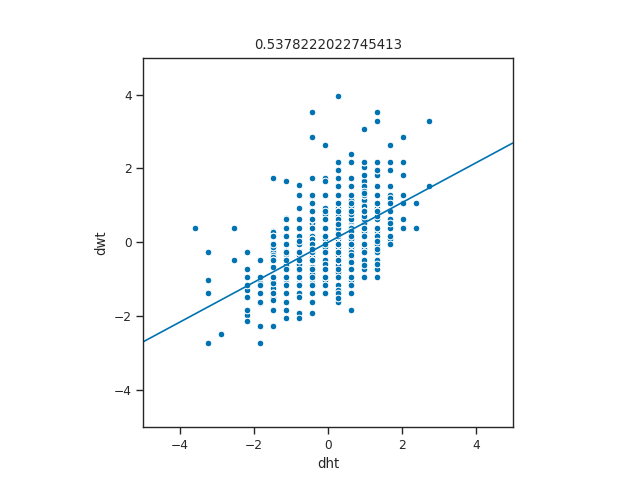

/home/jo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [62]:
fig = plt.figure()
sns.scatterplot(x=(df_babies.dht - df_babies.dht.mean()) / df_babies.dht.std(),
                y=(df_babies.dwt - df_babies.dwt.mean()) / df_babies.dwt.std())  # standardization
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.axes().set_aspect('equal')

x = np.linspace(-5, 5, num=100)
plt.title(np.corrcoef(df_babies["dwt"], df_babies["dht"])[0, 1])
my_saving_display(fig, dirname, "corre_wt_ht_dad", imageformat,saving=saving)
plt.plot(x, np.corrcoef(df_babies["dwt"], df_babies["dht"])[0, 1] * x)
my_saving_display(fig, dirname, "corre_wt_ht_dad_w_line", imageformat,saving=saving)

# from sklearn.linear_model import LinearRegression
# OLS = LinearRegression()
# X = (df_babies.dht - df_babies.dht.mean()) / df_babies.dht.std()
# yy = (df_babies.dwt - df_babies.dwt.mean()) / df_babies.dwt.std()
# OLS.fit(X.values.reshape(-1,1),yy.squeeze())
# plt.plot(x, OLS.predict(x.reshape(-1,1)),'r',lw=1)

In [63]:
np.corrcoef(df_babies["dwt"], df_babies["dht"])[0, 1]

0.5378222022745413